# Estrategia Trend Following

## Autor: Lucía Saiz Lapique

__Examen__

__Gestión de Activos y Carteras__

__CUNEF__

A continuación, se estudiaran tres activos (uno de renta variable, de renta fija y de materia prima) mediante una estrategia de tendencias con precios. En el desempeño de esta estrategia utilizamos los datos de precios para cada activo
seleccionado, y obtenemos la serie de rendimientos diaria de forma discreta.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
datos = pd.read_excel('datos_examen.xlsx', sheet_name = 'Precios')
datos = datos.set_index('Date')
observacion = datos.index >= dt.datetime(2014, 12, 6)
datos = datos[(observacion)] 
datos

,DOW JONES,Japanese Bond,DKK-EUR X-RATE,CAD-USD X-RATE,DKK DEPOSIT,CAD DEPOSIT,Oro,EUR_USD
Date,,,,,,,,
2014-12-08,17852.48,147.14,0.1344,0.8713,0.260,1.575,1203.51,1.2317
2014-12-09,17801.20,147.40,0.1344,0.8738,0.673,1.355,1231.06,1.2374
2014-12-10,17533.15,147.42,0.1344,0.8711,0.250,1.555,1226.31,1.2448
2014-12-11,17596.34,147.49,0.1345,0.8681,0.260,1.545,1227.72,1.2411
2014-12-12,17280.83,147.25,0.1344,0.8636,0.280,1.565,1222.59,1.2462
...,...,...,...,...,...,...,...,...
2020-04-27,24133.78,152.82,0.1341,0.7125,-0.635,0.770,1713.99,1.0829
2020-04-28,24101.55,152.84,0.1341,0.7144,-0.135,0.785,1707.79,1.0820
2020-04-29,24633.86,152.84,0.1341,0.7205,-0.635,0.780,1713.41,1.0873


In [3]:
datos_trend = datos[['DOW JONES', 'Japanese Bond', 'Oro', 'EUR_USD']]
datos_trend = datos_trend.iloc[:,:-1].div(datos_trend.EUR_USD, axis=0)
datos_trend

,DOW JONES,Japanese Bond,Oro
Date,,,
2014-12-08,14494.178777,119.460908,977.112933
2014-12-09,14385.970583,119.120737,994.876354
2014-12-10,14085.114075,118.428663,985.146208
2014-12-11,14178.019499,118.838127,989.219241
2014-12-12,13866.819130,118.159204,981.054405
...,...,...,...
2020-04-27,22286.249885,141.121064,1582.777726
2020-04-28,22275.000000,141.256932,1578.364140
2020-04-29,22655.991907,140.568380,1575.839235


In [4]:
rentab = datos_trend.pct_change().dropna()
rentab

,DOW JONES,Japanese Bond,Oro
Date,,,
2014-12-09,-0.007466,-0.002848,0.018179
2014-12-10,-0.020913,-0.005810,-0.009780
2014-12-11,0.006596,0.003457,0.004134
2014-12-12,-0.021949,-0.005713,-0.008254
2014-12-15,-0.003788,0.002895,-0.022053
...,...,...,...
2020-04-27,0.014517,0.000166,-0.009574
2020-04-28,-0.000505,0.000963,-0.002789
2020-04-29,0.017104,-0.004874,-0.001600


In [5]:
dow = pd.DataFrame(datos['DOW JONES'])

Establecemos 4 horizontes: 10 días, 30 días 50 días, 100 días. Obtenemos el promedio del
precio de los últimos 10, 30, 50 y 100 días en cada caso y por separado, es decir la media
móvil simple de una ventana móvil.

In [6]:
dow['Media 10 días'] = dow['DOW JONES'].rolling(window = 10).mean()
dow['Media 30 días'] = dow['DOW JONES'].rolling(window = 30).mean()
dow['Media 50 días'] = dow['DOW JONES'].rolling(window = 49).mean()
dow['Media 100 días'] = dow['DOW JONES'].rolling(window = 100).mean()

In [7]:
dow = dow.dropna()
dow

,DOW JONES,Media 10 días,Media 30 días,Media 50 días,Media 100 días
Date,,,,,
2015-05-01,18024.06,18020.984,17950.717667,17975.529592,17828.7659
2015-05-04,18070.40,18024.531,17948.809333,17974.581837,17830.9451
2015-05-05,17928.20,18022.392,17942.548000,17968.847347,17832.2151
2015-05-06,17841.98,18002.763,17936.909333,17961.039388,17835.3034
2015-05-07,17924.06,17989.300,17943.760000,17955.113673,17838.5806
...,...,...,...,...,...
2020-04-27,24133.78,23680.373,22186.924667,23756.783469,26261.9289
2020-04-28,24101.55,23695.552,22317.359000,23652.076531,26227.9163
2020-04-29,24633.86,23808.503,22430.575000,23555.868980,26197.7571


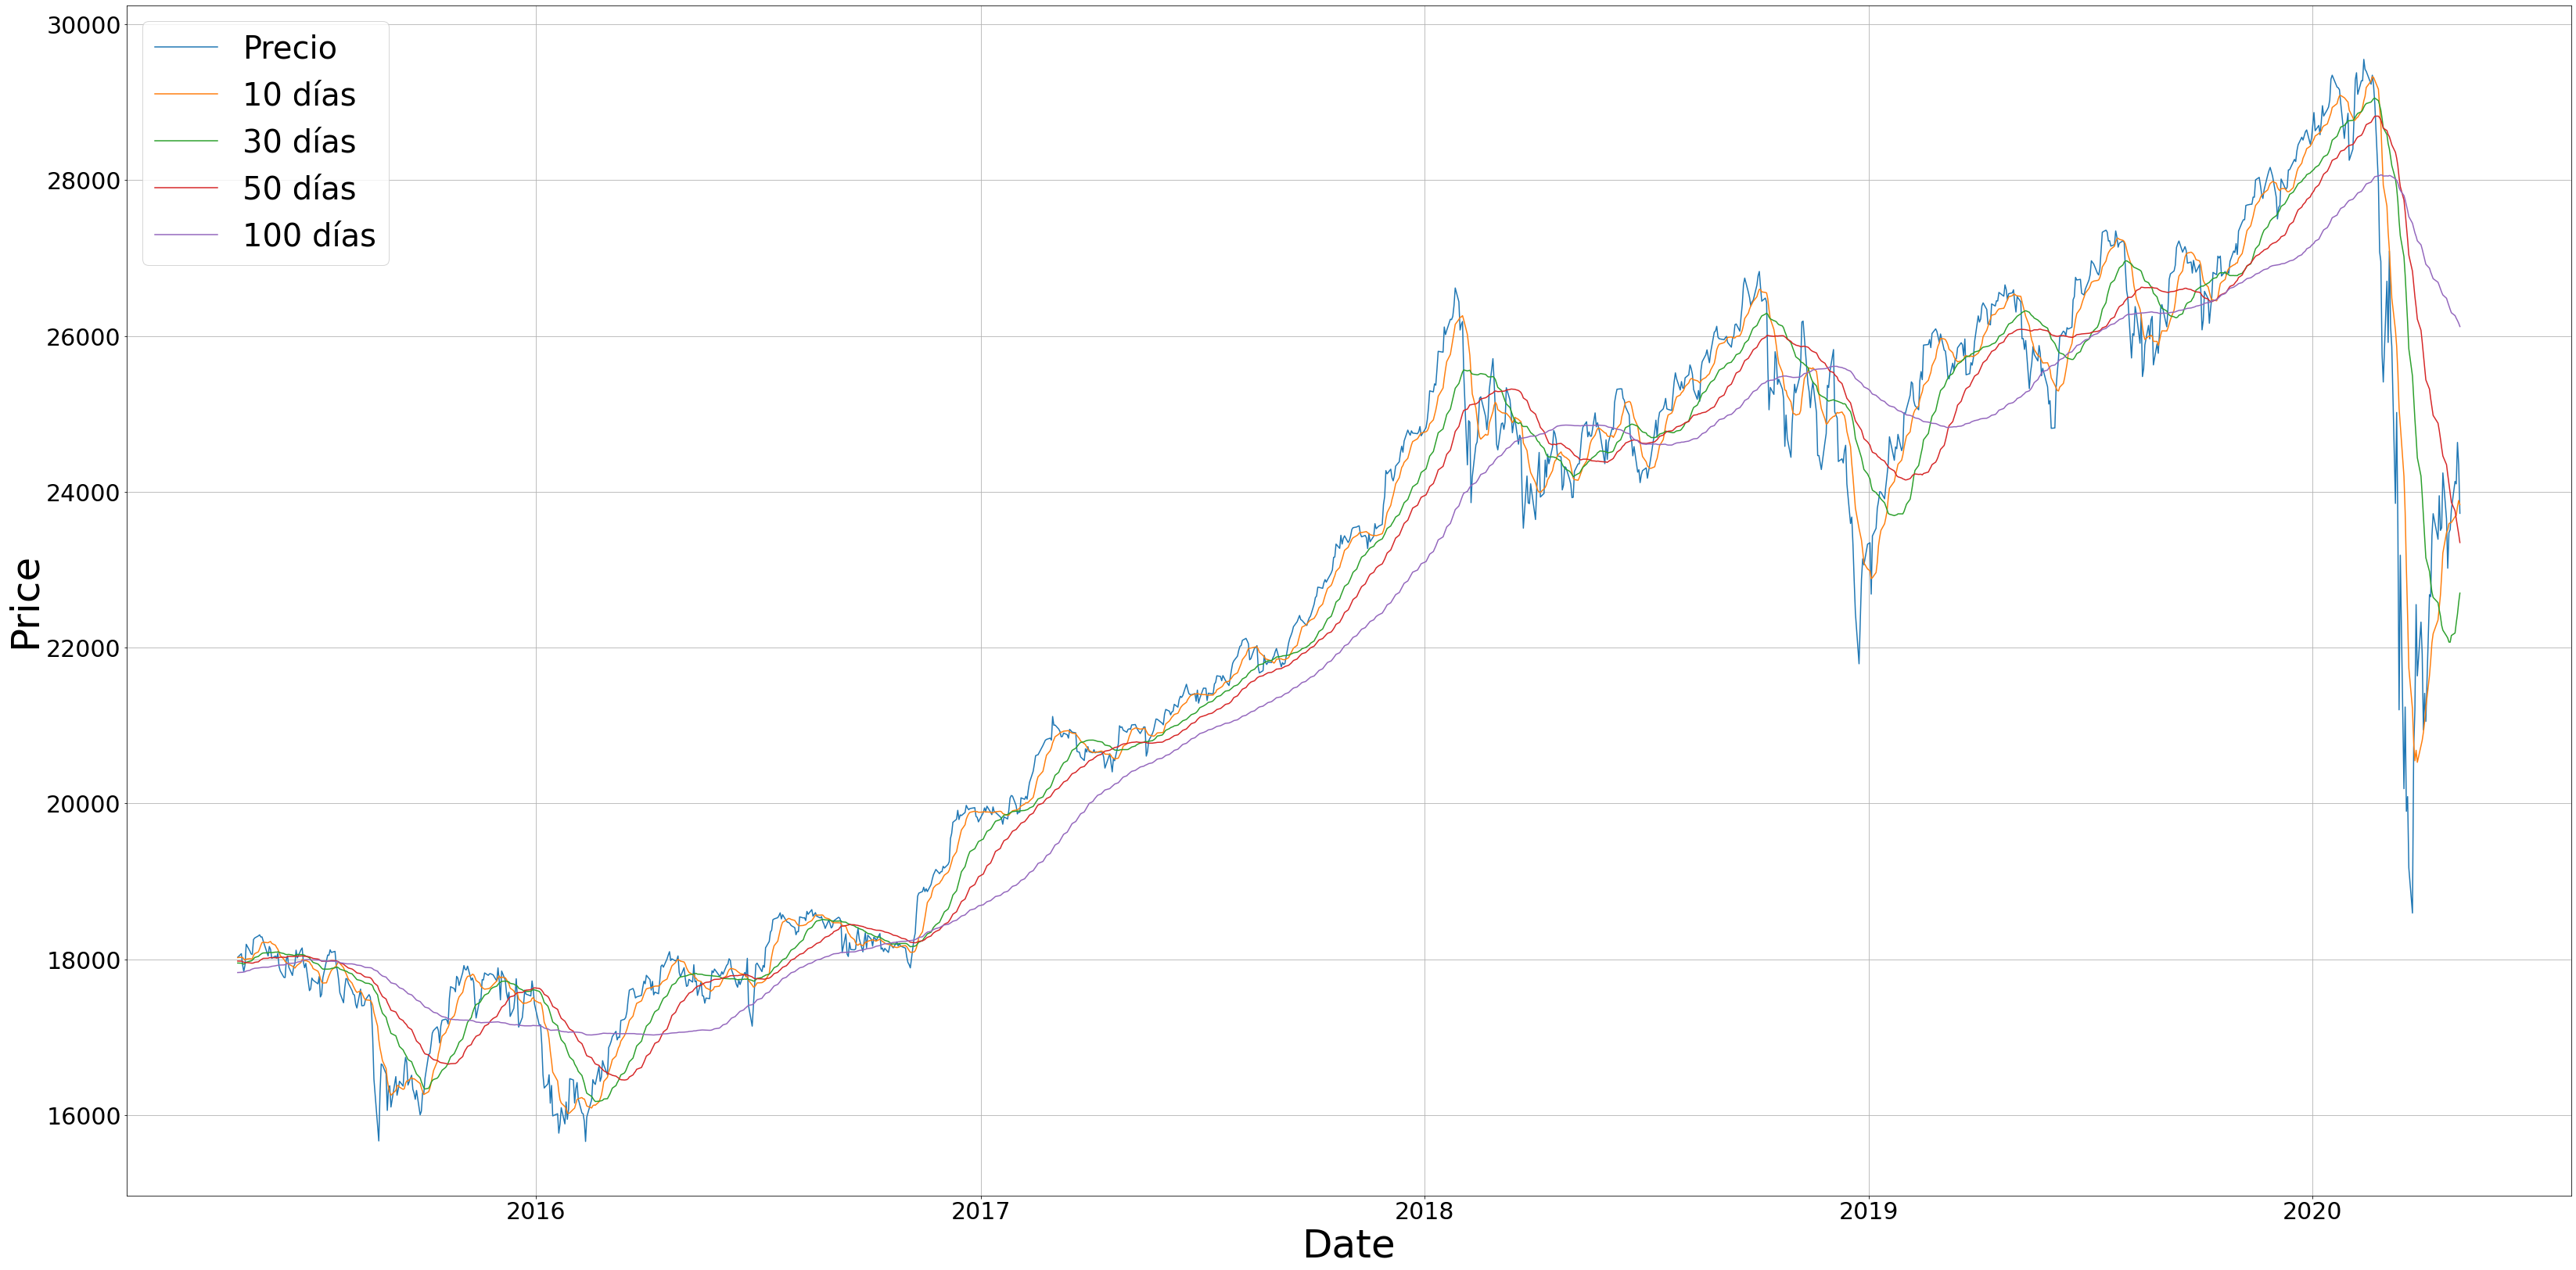

In [8]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(dow["DOW JONES"])
ax1 = plt.plot(dow["Media 10 días"])
ax1 = plt.plot(dow["Media 30 días"])
ax1 = plt.plot(dow["Media 50 días"])
ax1 = plt.plot(dow["Media 100 días"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Precio", "10 días", "30 días", "50 días", "100 días"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

Una vez hemos construido las medias móviles, construimos las señales. Para ello hemos
cogido corto, medio y largo plazo, haciendo un modelo con el mismo peso para cada uno, es
decir con un peso igual a un tercio para cada uno. Dentro de la señal de cortes de medias móviles, le
damos una ponderación del 50% porque después vamos a tener la señal del 50% también
de la resistencia (precio máximo) o el soporte (precio mínimo).

In [9]:
short_term = 3/5
mid_term = 1/5
long_term = 1/5
totales = [short_term, mid_term, long_term]
señales_peso = 0.5

In [10]:
señales = pd.DataFrame()

In [11]:
señales['Señal Corto'] = np.where((np.isnan(dow['Media 10 días']) | np.isnan(dow['Media 30 días'])), 0, np.where((dow['Media 10 días'] > dow['Media 30 días']), 1, -1))
señales['Señal Medio'] = np.where((np.isnan(dow['Media 30 días']) | np.isnan(dow['Media 50 días'])), 0, np.where((dow['Media 30 días'] > dow['Media 50 días']), 1, -1))
señales['Señal Largo'] = np.where((np.isnan(dow['Media 50 días']) | np.isnan(dow['Media 100 días'])), 0, np.where((dow['Media 50 días'] > dow['Media 100 días']), 1, -1))

In [12]:
señales = señales.set_index(dow.index)
señales

,Señal Corto,Señal Medio,Señal Largo
Date,,,
2015-05-01,1,-1,1
2015-05-04,1,-1,1
2015-05-05,1,-1,1
2015-05-06,1,-1,1
2015-05-07,1,-1,1
...,...,...,...
2020-04-27,1,-1,-1
2020-04-28,1,-1,-1
2020-04-29,1,-1,-1


In [13]:
señales['Total MM'] = (totales*señales).sum(axis=1)
señales.head()

,Señal Corto,Señal Medio,Señal Largo,Total MM
Date,,,,
2015-05-01,1,-1,1,0.6
2015-05-04,1,-1,1,0.6
2015-05-05,1,-1,1,0.6
2015-05-06,1,-1,1,0.6
2015-05-07,1,-1,1,0.6


Para obtener la resistencia y el soporte, cogemos un periodo móvil, el de las últimas 100
sesiones ya que para las señales que tenemos de corta, media y larga tendencia, a la hora
de coger un periodo, 100 días es suficientemente representativo. Más días igual lo que me
hace el modelo es que vaya más lento. Este periodo permite que reaccione y que sea estable.

In [14]:
# Ahora calculo las resistencia y soportes

dow['Resistencia'] = datos['DOW JONES'].rolling(window=100).max()
dow['Soporte'] = datos['DOW JONES'].rolling(window=100).min()

In [15]:
dow.head()

,DOW JONES,Media 10 días,Media 30 días,Media 50 días,Media 100 días,Resistencia,Soporte
Date,,,,,,,
2015-05-01,18024.06,18020.984,17950.717667,17975.529592,17828.7659,18288.63,17068.87
2015-05-04,18070.40,18024.531,17948.809333,17974.581837,17830.9451,18288.63,17068.87
2015-05-05,17928.20,18022.392,17942.548000,17968.847347,17832.2151,18288.63,17068.87
2015-05-06,17841.98,18002.763,17936.909333,17961.039388,17835.3034,18288.63,17068.87
2015-05-07,17924.06,17989.300,17943.760000,17955.113673,17838.5806,18288.63,17068.87


Obtenemos una señal que indica se está superando la resistencia o el soporte, tanto por
arriba como por abajo con un 1, y con un 0 cuando no se supera

In [16]:
señales['Total R/S'] = np.where((dow['DOW JONES'] >= dow.Resistencia), 1, np.where((dow['DOW JONES'] <= dow.Soporte), -1, 0))
señales['Total R/S']  = señales['Total R/S']*0.5
señales.head()

,Señal Corto,Señal Medio,Señal Largo,Total MM,Total R/S
Date,,,,,
2015-05-01,1,-1,1,0.6,0.0
2015-05-04,1,-1,1,0.6,0.0
2015-05-05,1,-1,1,0.6,0.0
2015-05-06,1,-1,1,0.6,0.0
2015-05-07,1,-1,1,0.6,0.0


In [17]:
final = señales['Total MM']*señales_peso + señales['Total R/S']*señales_peso
final

Date
2015-05-01    0.3
2015-05-04    0.3
2015-05-05    0.3
2015-05-06    0.3
2015-05-07    0.3
             ... 
2020-04-27    0.1
2020-04-28    0.1
2020-04-29    0.1
2020-04-30    0.1
2020-05-01    0.1
Length: 1260, dtype: float64

In [18]:
observacion2 = rentab.index >= dt.datetime(2015, 5, 1)
rentab = rentab[(observacion2)]

In [19]:
dow['Trending Following_Renta Variable'] = 100
for i in range(1, len(dow)):
    dow['Trending Following_Renta Variable'].iloc[i] = dow['Trending Following_Renta Variable'].iloc[i-1]*(1+(final.iloc[i]*rentab['DOW JONES']).iloc[i])

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
dow

,DOW JONES,Media 10 días,Media 30 días,Media 50 días,Media 100 días,Resistencia,Soporte,Trending Following_Renta Variable
Date,,,,,,,,
2015-05-01,18024.06,18020.984,17950.717667,17975.529592,17828.7659,18288.63,17068.87,100.000000
2015-05-04,18070.40,18024.531,17948.809333,17974.581837,17830.9451,18288.63,17068.87,100.220149
2015-05-05,17928.20,18022.392,17942.548000,17968.847347,17832.2151,18288.63,17068.87,99.879543
2015-05-06,17841.98,18002.763,17936.909333,17961.039388,17835.3034,18288.63,17068.87,99.309707
2015-05-07,17924.06,17989.300,17943.760000,17955.113673,17838.5806,18288.63,17068.87,99.659281
...,...,...,...,...,...,...,...,...
2020-04-27,24133.78,23680.373,22186.924667,23756.783469,26261.9289,29551.42,18591.93,153.682901
2020-04-28,24101.55,23695.552,22317.359000,23652.076531,26227.9163,29551.42,18591.93,153.675144
2020-04-29,24633.86,23808.503,22430.575000,23555.868980,26197.7571,29551.42,18591.93,153.937990


## Renta Fija

In [21]:
bono = pd.DataFrame(datos['Japanese Bond'])

Establecemos 4 horizontes: 10 días, 30 días 50 días, 100 días. Obtenemos el promedio del precio de los últimos 10, 30, 50 y 100 días en cada caso y por separado, es decir la media móvil simple de una ventana móvil.

In [22]:
bono['Media 10 días'] = bono['Japanese Bond'].rolling(window = 10).mean()
bono['Media 30 días'] = bono['Japanese Bond'].rolling(window = 30).mean()
bono['Media 50 días'] = bono['Japanese Bond'].rolling(window = 50).mean()
bono['Media 100 días'] = bono['Japanese Bond'].rolling(window = 100).mean()

In [23]:
bono = bono.dropna()
bono

,Japanese Bond,Media 10 días,Media 30 días,Media 50 días,Media 100 días
Date,,,,,
2015-05-01,147.50,147.992,147.817333,147.6858,147.7065
2015-05-04,147.50,147.949,147.804000,147.6892,147.7101
2015-05-05,147.50,147.906,147.786333,147.6908,147.7111
2015-05-06,147.50,147.853,147.770667,147.6908,147.7119
2015-05-07,146.77,147.735,147.734667,147.6692,147.7047
...,...,...,...,...,...
2020-04-27,152.82,152.343,152.212333,152.7704,152.5435
2020-04-28,152.84,152.405,152.211000,152.7774,152.5465
2020-04-29,152.84,152.476,152.220333,152.7786,152.5476


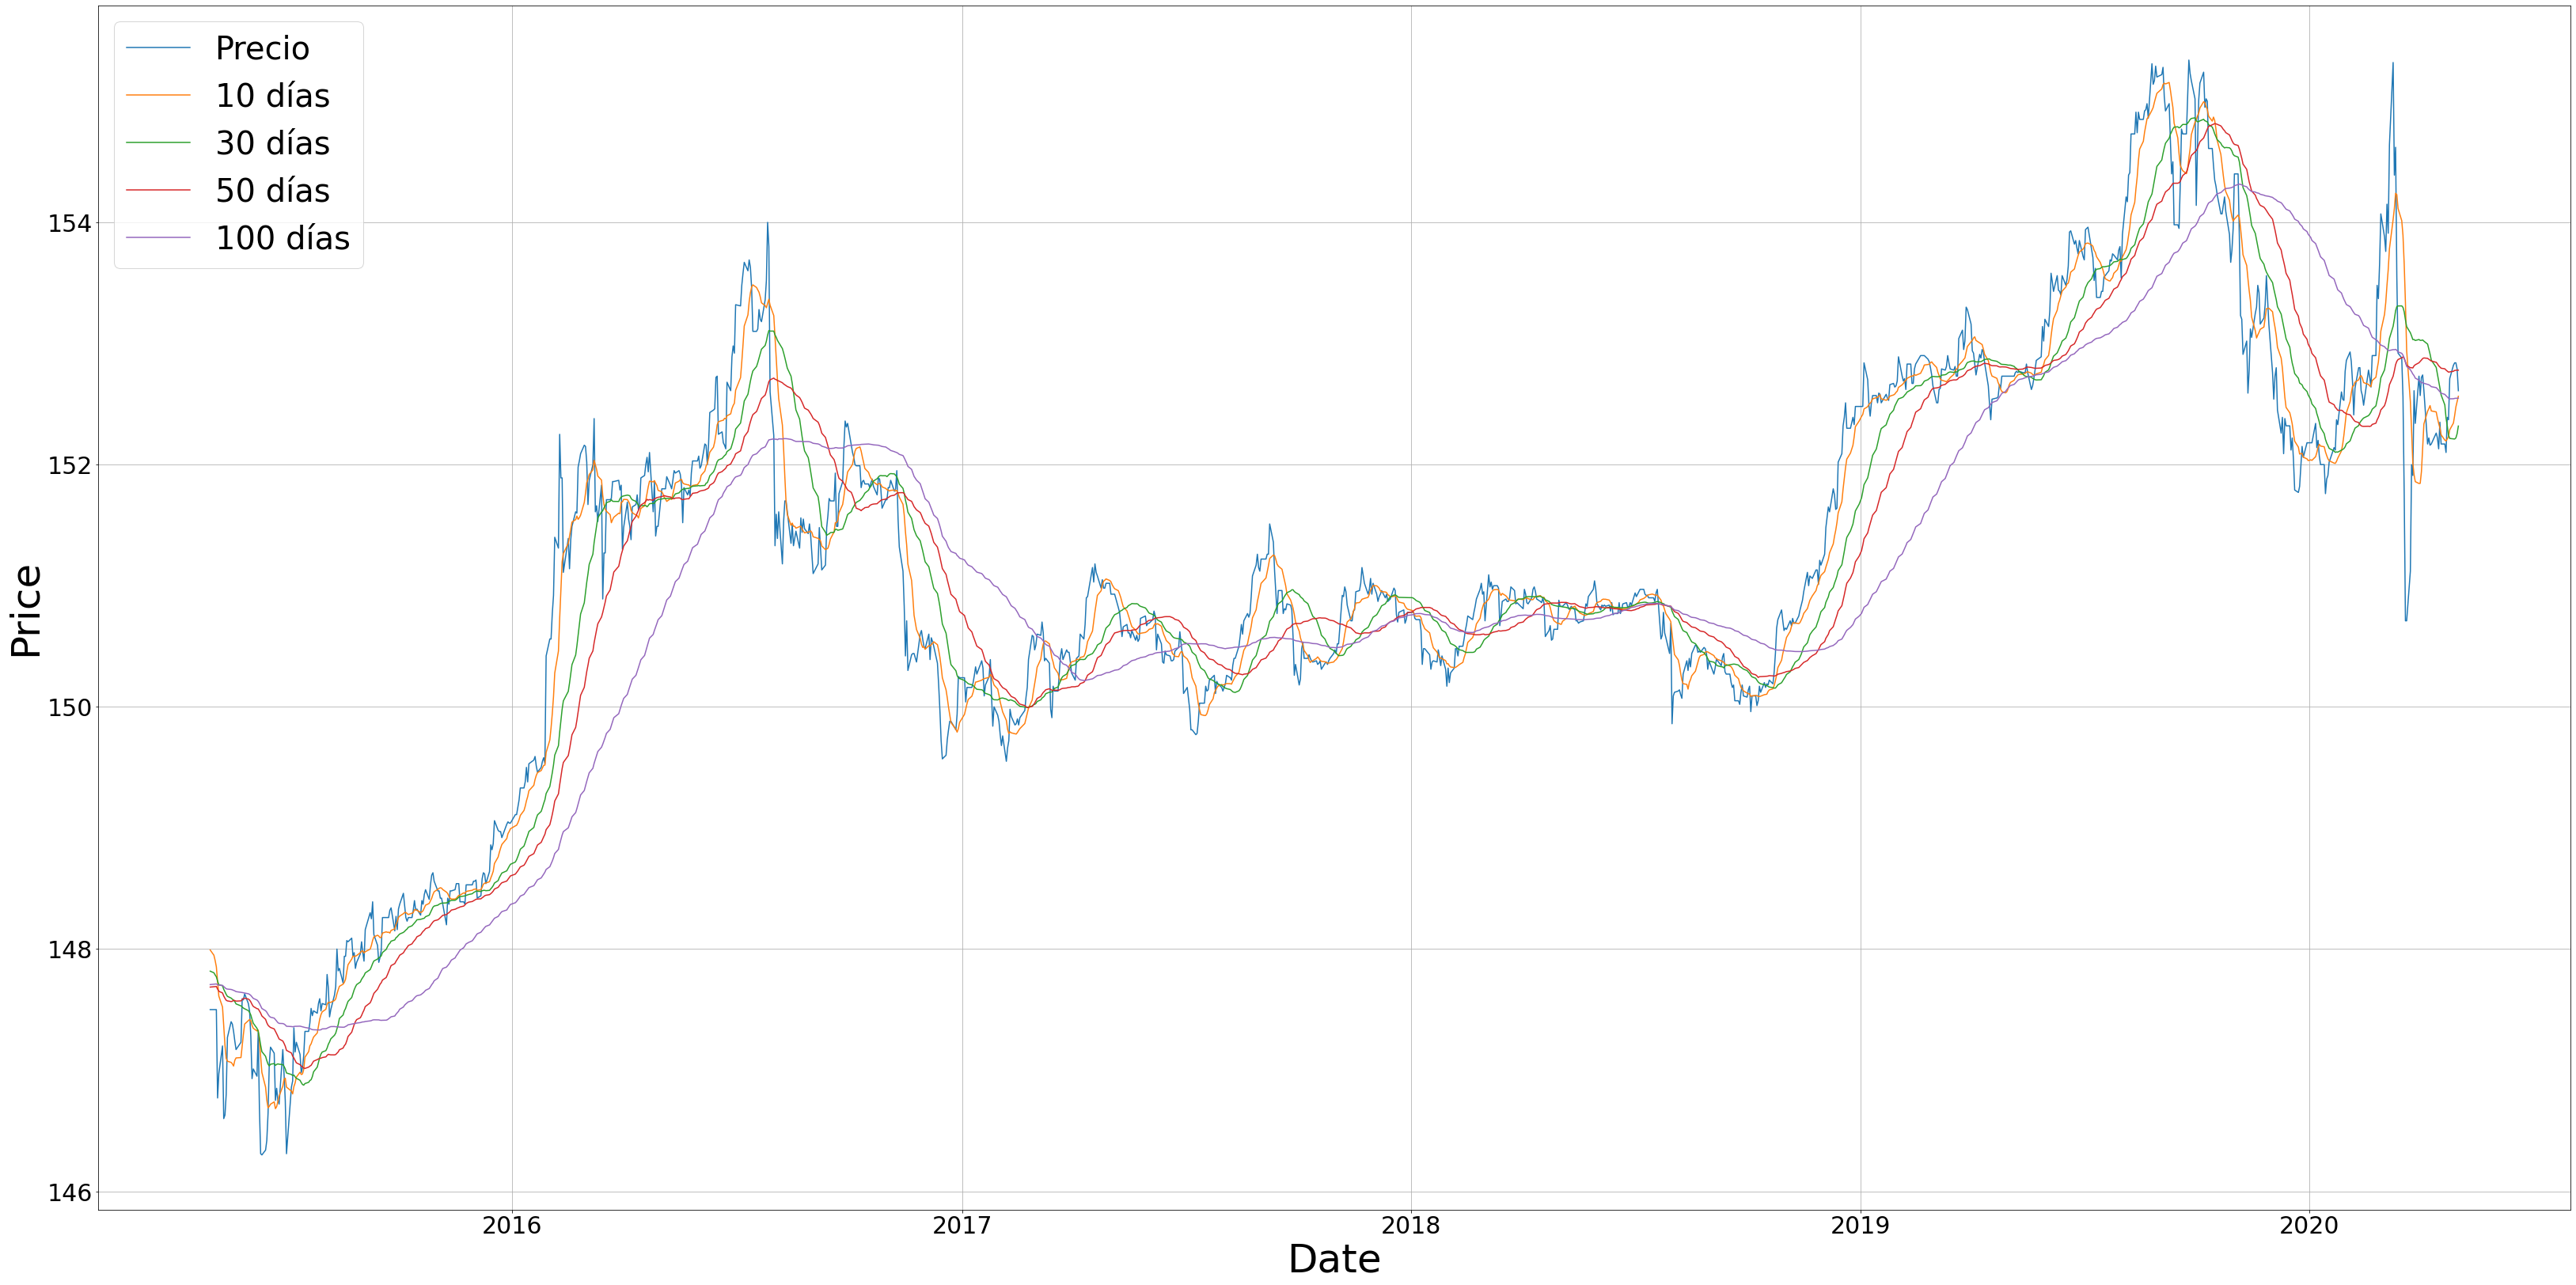

In [24]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(bono["Japanese Bond"])
ax1 = plt.plot(bono["Media 10 días"])
ax1 = plt.plot(bono["Media 30 días"])
ax1 = plt.plot(bono["Media 50 días"])
ax1 = plt.plot(bono["Media 100 días"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Precio", "10 días", "30 días", "50 días", "100 días"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

Una vez hemos construido las medias móviles, construimos las señales. Para ello hemos
cogido corto, medio y largo plazo, haciendo un modelo con el mismo peso para cada uno, es
decir con un peso igual a un tercio para cada uno. Dentro de la señal de cortes de medias móviles, le
damos una ponderación del 50% porque después vamos a tener la señal del 50% también
de la resistencia (precio máximo) o el soporte (precio mínimo).

In [25]:
short_term = 3/5
mid_term = 1/5
long_term = 1/5
totales = [short_term, mid_term, long_term]
señales_peso = 0.5

In [26]:
señales = pd.DataFrame()

In [27]:
señales['Señal Corto'] = np.where((np.isnan(bono['Media 10 días']) | np.isnan(bono['Media 30 días'])), 0, np.where((bono['Media 10 días'] > bono['Media 30 días']), 1, -1))
señales['Señal Medio'] = np.where((np.isnan(bono['Media 30 días']) | np.isnan(bono['Media 50 días'])), 0, np.where((bono['Media 30 días'] > bono['Media 50 días']), 1, -1))
señales['Señal Largo'] = np.where((np.isnan(bono['Media 50 días']) | np.isnan(bono['Media 100 días'])), 0, np.where((bono['Media 50 días'] > bono['Media 100 días']), 1, -1))

In [28]:
señales = señales.set_index(bono.index)
señales.head()

,Señal Corto,Señal Medio,Señal Largo
Date,,,
2015-05-01,1,1,-1
2015-05-04,1,1,-1
2015-05-05,1,1,-1
2015-05-06,1,1,-1
2015-05-07,1,1,-1


In [29]:
señales['Total MM'] = (totales*señales).sum(axis=1)
señales.head()

,Señal Corto,Señal Medio,Señal Largo,Total MM
Date,,,,
2015-05-01,1,1,-1,0.6
2015-05-04,1,1,-1,0.6
2015-05-05,1,1,-1,0.6
2015-05-06,1,1,-1,0.6
2015-05-07,1,1,-1,0.6


Para obtener la resistencia y el soporte, cogemos un periodo móvil, el de las últimas 100
sesiones ya que para las señales que tenemos de corta, media y larga tendencia, a la hora
de coger un periodo, 100 días es suficientemente representativo. Más días igual lo que me
hace el modelo es que vaya más lento. Este periodo permite que reaccione y que sea estable.

In [30]:
# Ahora calculo las resistencia y soportes

bono['Resistencia'] = datos['Japanese Bond'].rolling(window=100).max()
bono['Soporte'] = datos['Japanese Bond'].rolling(window=100).min()

In [31]:
bono.head()

,Japanese Bond,Media 10 días,Media 30 días,Media 50 días,Media 100 días,Resistencia,Soporte
Date,,,,,,,
2015-05-01,147.50,147.992,147.817333,147.6858,147.7065,148.53,146.89
2015-05-04,147.50,147.949,147.804000,147.6892,147.7101,148.53,146.89
2015-05-05,147.50,147.906,147.786333,147.6908,147.7111,148.53,146.89
2015-05-06,147.50,147.853,147.770667,147.6908,147.7119,148.53,146.89
2015-05-07,146.77,147.735,147.734667,147.6692,147.7047,148.53,146.77


Obtenemos una señal que indica se está superando la resistencia o el soporte, tanto por
arriba como por abajo con un 1, y con un 0 cuando no se supera

In [32]:
señales['Total R/S'] = np.where((bono['Japanese Bond'] >= bono.Resistencia), 1, np.where((bono['Japanese Bond'] <= bono.Soporte), -1, 0))
señales['Total R/S']  = señales['Total R/S']*0.5
señales.head()

,Señal Corto,Señal Medio,Señal Largo,Total MM,Total R/S
Date,,,,,
2015-05-01,1,1,-1,0.6,0.0
2015-05-04,1,1,-1,0.6,0.0
2015-05-05,1,1,-1,0.6,0.0
2015-05-06,1,1,-1,0.6,0.0
2015-05-07,1,1,-1,0.6,-0.5


In [33]:
final = señales['Total MM']*señales_peso + señales['Total R/S']*señales_peso
final

Date
2015-05-01    0.30
2015-05-04    0.30
2015-05-05    0.30
2015-05-06    0.30
2015-05-07    0.05
              ... 
2020-04-27    0.30
2020-04-28    0.30
2020-04-29    0.30
2020-04-30    0.30
2020-05-01    0.30
Length: 1260, dtype: float64

In [34]:
observacion2 = rentab.index >= dt.datetime(2015, 5, 1)
rentab = rentab[(observacion2)]

In [35]:
bono['Trending Following_Renta Fija'] = 100
for i in range(1, len(bono)):   
    bono['Trending Following_Renta Fija'].iloc[i] = bono['Trending Following_Renta Fija'].iloc[i-1]*(1+final.iloc[i]*rentab['Japanese Bond'].iloc[i])

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
bono

,Japanese Bond,Media 10 días,Media 30 días,Media 50 días,Media 100 días,Resistencia,Soporte,Trending Following_Renta Fija
Date,,,,,,,,
2015-05-01,147.50,147.992,147.817333,147.6858,147.7065,148.53,146.89,100.000000
2015-05-04,147.50,147.949,147.804000,147.6892,147.7101,148.53,146.89,100.142652
2015-05-05,147.50,147.906,147.786333,147.6908,147.7111,148.53,146.89,100.037898
2015-05-06,147.50,147.853,147.770667,147.6908,147.7119,148.53,146.89,99.609429
2015-05-07,146.77,147.735,147.734667,147.6692,147.7047,148.53,146.77,99.619968
...,...,...,...,...,...,...,...,...
2020-04-27,152.82,152.343,152.212333,152.7704,152.5435,155.32,150.71,99.586786
2020-04-28,152.84,152.405,152.211000,152.7774,152.5465,155.32,150.71,99.615550
2020-04-29,152.84,152.476,152.220333,152.7786,152.5476,155.32,150.71,99.469878


## Materia Prima: Petróleo

In [37]:
Oro = pd.DataFrame(datos['Oro'])

Establecemos 4 horizontes: 10 días, 30 días 50 días, 100 días. Obtenemos el promedio del
precio de los últimos 10, 30, 50 y 100 días en cada caso y por separado, es decir la media
móvil simple de una ventana móvil.

In [38]:
Oro['Media 10 días'] = Oro['Oro'].rolling(window = 10).mean()
Oro['Media 30 días'] = Oro['Oro'].rolling(window = 30).mean()
Oro['Media 50 días'] = Oro['Oro'].rolling(window = 50).mean()
Oro['Media 100 días'] = Oro['Oro'].rolling(window = 100).mean()

In [39]:
Oro = Oro.dropna()
Oro

,Oro,Media 10 días,Media 30 días,Media 50 días,Media 100 días
Date,,,,,
2015-05-01,1178.46,1194.026,1196.890667,1191.1006,1210.8212
2015-05-04,1188.33,1193.270,1197.083667,1190.8284,1210.6694
2015-05-05,1193.34,1192.363,1197.210333,1190.6586,1210.2922
2015-05-06,1192.24,1192.874,1197.175667,1190.4928,1209.9515
2015-05-07,1184.51,1191.928,1196.810333,1190.0830,1209.5194
...,...,...,...,...,...
2020-04-27,1713.99,1711.455,1635.158000,1631.3096,1581.2405
2020-04-28,1707.79,1709.537,1641.614333,1633.7842,1583.5423
2020-04-29,1713.41,1709.175,1647.784667,1636.0202,1585.9305


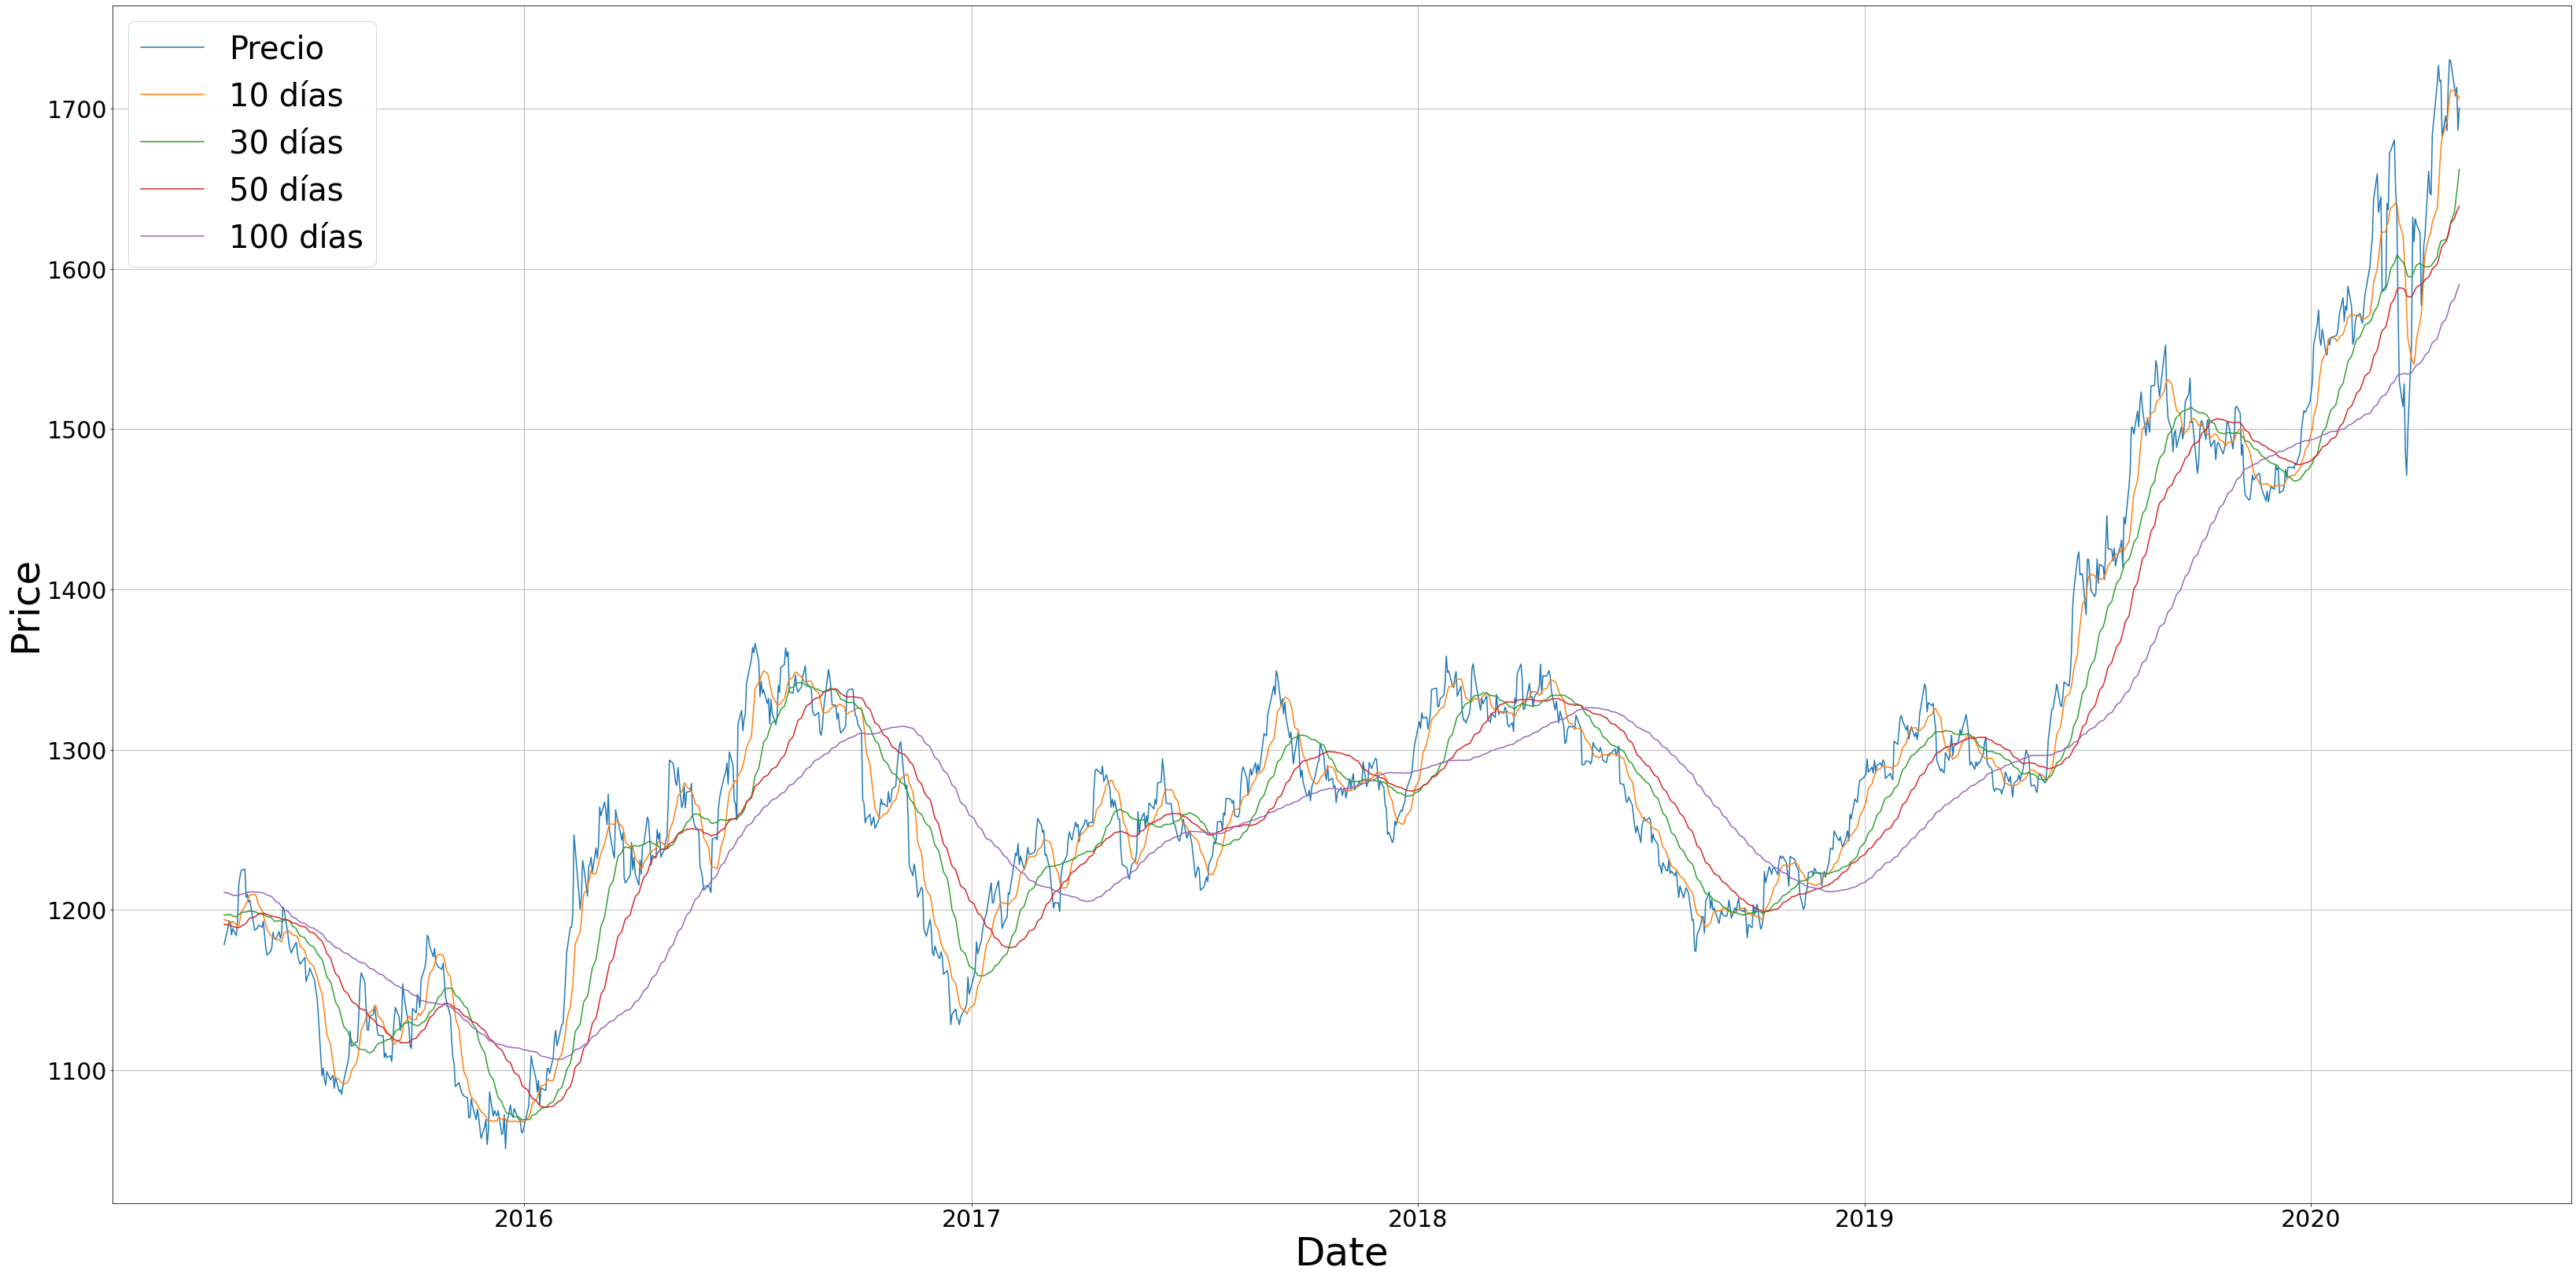

In [40]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Oro["Oro"])
ax1 = plt.plot(Oro["Media 10 días"])
ax1 = plt.plot(Oro["Media 30 días"])
ax1 = plt.plot(Oro["Media 50 días"])
ax1 = plt.plot(Oro["Media 100 días"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Precio", "10 días", "30 días", "50 días", "100 días"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

Una vez hemos construido las medias móviles, construimos las señales. Para ello hemos
cogido corto, medio y largo plazo, haciendo un modelo con el mismo peso para cada uno, es
decir con un peso igual a un tercio para cada uno. Dentro de la señal de cortes de medias móviles, le
damos una ponderación del 50% porque después vamos a tener la señal del 50% también
de la resistencia (precio máximo) o el soporte (precio mínimo).

In [41]:
short_term = 3/5
mid_term = 1/5
long_term = 1/5
totales = [short_term, mid_term, long_term]
señales_peso = 0.5

In [42]:
señales = pd.DataFrame()

In [43]:
señales['Señal Corto'] = np.where((np.isnan(Oro['Media 10 días']) | np.isnan(Oro['Media 30 días'])), 0, np.where((Oro['Media 10 días'] > Oro['Media 30 días']), 1, -1))
señales['Señal Medio'] = np.where((np.isnan(Oro['Media 30 días']) | np.isnan(Oro['Media 50 días'])), 0, np.where((Oro['Media 30 días'] > Oro['Media 50 días']), 1, -1))
señales['Señal Largo'] = np.where((np.isnan(Oro['Media 50 días']) | np.isnan(Oro['Media 100 días'])), 0, np.where((Oro['Media 50 días'] > Oro['Media 100 días']), 1, -1))

In [44]:
señales = señales.set_index(Oro.index)
señales.head()

,Señal Corto,Señal Medio,Señal Largo
Date,,,
2015-05-01,-1,1,-1
2015-05-04,-1,1,-1
2015-05-05,-1,1,-1
2015-05-06,-1,1,-1
2015-05-07,-1,1,-1


In [45]:
señales['Total MM'] = (totales*señales).sum(axis=1)
señales.head()

,Señal Corto,Señal Medio,Señal Largo,Total MM
Date,,,,
2015-05-01,-1,1,-1,-0.6
2015-05-04,-1,1,-1,-0.6
2015-05-05,-1,1,-1,-0.6
2015-05-06,-1,1,-1,-0.6
2015-05-07,-1,1,-1,-0.6


Para obtener la resistencia y el soporte, cogemos un periodo móvil, el de las últimas 100
sesiones ya que para las señales que tenemos de corta, media y larga tendencia, a la hora
de coger un periodo, 100 días es suficientemente representativo. Más días igual lo que me
hace el modelo es que vaya más lento. Este periodo permite que reaccione y que sea estable.

In [46]:
# Ahora calculo las resistencia y soportes

Oro['Resistencia'] = datos['Oro'].rolling(window=100).max()
Oro['Soporte'] = datos['Oro'].rolling(window=100).min()

In [47]:
Oro.head()

,Oro,Media 10 días,Media 30 días,Media 50 días,Media 100 días,Resistencia,Soporte
Date,,,,,,,
2015-05-01,1178.46,1194.026,1196.890667,1191.1006,1210.8212,1302.25,1149.57
2015-05-04,1188.33,1193.270,1197.083667,1190.8284,1210.6694,1302.25,1149.57
2015-05-05,1193.34,1192.363,1197.210333,1190.6586,1210.2922,1302.25,1149.57
2015-05-06,1192.24,1192.874,1197.175667,1190.4928,1209.9515,1302.25,1149.57
2015-05-07,1184.51,1191.928,1196.810333,1190.0830,1209.5194,1302.25,1149.57


Obtenemos una señal que indica se está superando la resistencia o el soporte, tanto por
arriba como por abajo con un 1, y con un 0 cuando no se supera

In [48]:
señales['Total R/S'] = np.where((Oro['Oro'] >= Oro.Resistencia), 1, np.where((Oro['Oro'] <= Oro.Soporte), -1, 0))
señales['Total R/S']  = señales['Total R/S']*0.5
señales.head()

,Señal Corto,Señal Medio,Señal Largo,Total MM,Total R/S
Date,,,,,
2015-05-01,-1,1,-1,-0.6,0.0
2015-05-04,-1,1,-1,-0.6,0.0
2015-05-05,-1,1,-1,-0.6,0.0
2015-05-06,-1,1,-1,-0.6,0.0
2015-05-07,-1,1,-1,-0.6,0.0


In [49]:
final = señales['Total MM']*señales_peso + señales['Total R/S']*señales_peso
final

Date
2015-05-01   -0.3
2015-05-04   -0.3
2015-05-05   -0.3
2015-05-06   -0.3
2015-05-07   -0.3
             ... 
2020-04-27    0.5
2020-04-28    0.5
2020-04-29    0.5
2020-04-30    0.5
2020-05-01    0.5
Length: 1260, dtype: float64

In [50]:
observacion2 = rentab.index >= dt.datetime(2015, 5, 1)
rentab = rentab[(observacion2)]

In [51]:
Oro['Trending Following_Materia Prima'] = 100

for i in range(1, len(Oro)):
    Oro['Trending Following_Materia Prima'].iloc[i] = Oro['Trending Following_Materia Prima'].iloc[i-1]*(1+final.iloc[i]*rentab['Oro'].iloc[i])

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
Oro

,Oro,Media 10 días,Media 30 días,Media 50 días,Media 100 días,Resistencia,Soporte,Trending Following_Materia Prima
Date,,,,,,,,
2015-05-01,1178.46,1194.026,1196.890667,1191.1006,1210.8212,1302.25,1149.57,100.000000
2015-05-04,1188.33,1193.270,1197.083667,1190.8284,1210.6694,1302.25,1149.57,99.604893
2015-05-05,1193.34,1192.363,1197.210333,1190.6586,1210.2922,1302.25,1149.57,99.583543
2015-05-06,1192.24,1192.874,1197.175667,1190.4928,1209.9515,1302.25,1149.57,100.037212
2015-05-07,1184.51,1191.928,1196.810333,1190.0830,1209.5194,1302.25,1149.57,100.020083
...,...,...,...,...,...,...,...,...
2020-04-27,1713.99,1711.455,1635.158000,1631.3096,1581.2405,1730.51,1460.17,146.973556
2020-04-28,1707.79,1709.537,1641.614333,1633.7842,1583.5423,1730.51,1460.17,146.768638
2020-04-29,1713.41,1709.175,1647.784667,1636.0202,1585.9305,1730.51,1460.17,146.651245


In [53]:
Estrategia_Trend = pd.DataFrame(dow['Trending Following_Renta Variable'])
Estrategia_Trend['Trending Following_Materia Prima'] = Oro['Trending Following_Materia Prima']
Estrategia_Trend['Trending Following_Renta Fija'] = bono['Trending Following_Renta Fija']
Estrategia_Trend.head()

,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija
Date,,,
2015-05-01,100.000000,100.000000,100.000000
2015-05-04,100.220149,99.604893,100.142652
2015-05-05,99.879543,99.583543,100.037898
2015-05-06,99.309707,100.037212,99.609429
2015-05-07,99.659281,100.020083,99.619968


Comparamos las tres estrategias de cada activo y guardamos los datos para estudiar la cartera final más adelante.

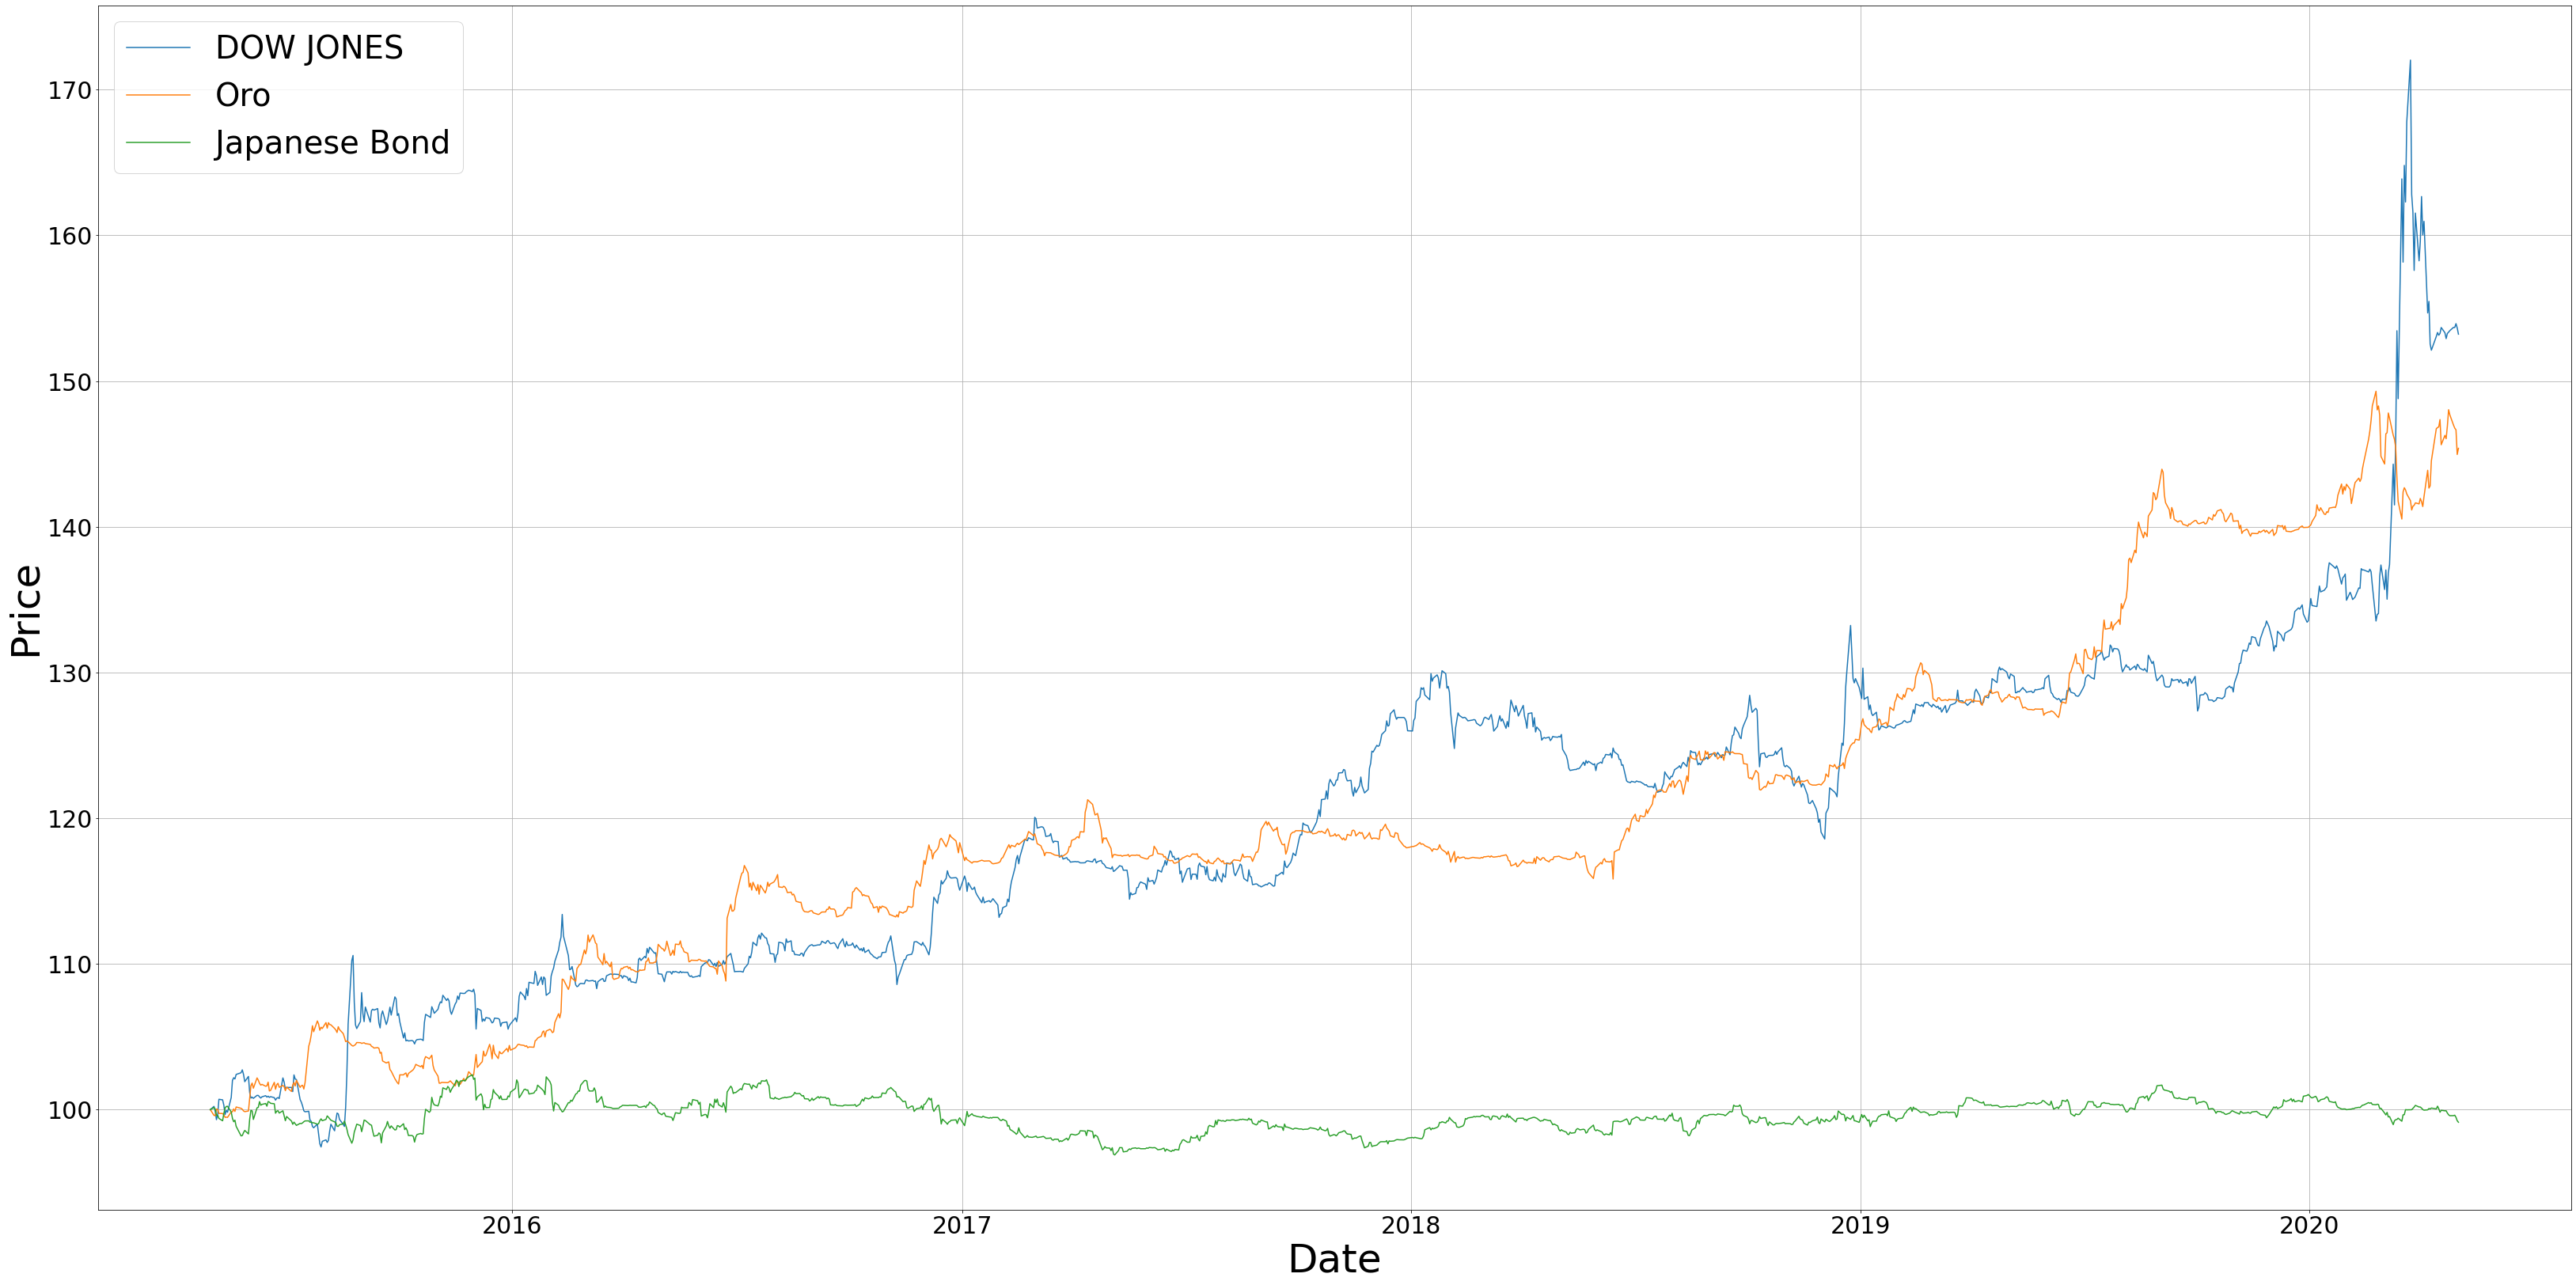

In [54]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Estrategia_Trend['Trending Following_Renta Variable'])
ax1 = plt.plot(Estrategia_Trend['Trending Following_Materia Prima'])
ax1 = plt.plot(Estrategia_Trend['Trending Following_Renta Fija'])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(['DOW JONES', 'Oro', 'Japanese Bond'],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [55]:
Estrategia_Trend.to_csv('Estrategia_Trend')